<a href="https://colab.research.google.com/github/sachsinghh/Study-Case-2/blob/main/Study_Case_2_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

**Kualitas data perusahaan** 
*   Data memiliki 10 kolom, yaitu 'ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'
*   Terdapat beberapa kolom yang memiliki missing values
*   Terdapat typo pada kolom 'Kota' dan 'Umur'

Sehingga akan dilakukan preprocessing terlebih dahulu terhadap data, seperti menghilangkan missing values, kemudian mengubah typo dengan menggunakan replace. Selain itu akan terdapat dua section yaitu untuk data yang menghapus kolom 'ID', 'Umur', dan 'Menikah' dan data yang menghapus kolom 'ID' dan 'Menikah' saja.

# Data Cleaning and Pre-processing

In [88]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [89]:
import google.colab; IN_COLAB = True
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    data1 = pd.read_csv("Case-Study-02-MixITup (1).csv", sep = ";" ,low_memory = False, encoding='utf8')   
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/sachsinghh/Study-Case-2/main/Case-Study-02-MixITup%20(1).csv
    data1 = pd.read_csv("Study-Case-2/Case-Study-02-MixITup (1).csv", sep = ";", low_memory = False, encoding='utf8')

data1.shape

(200, 10)

Kami menggunakan data yang sudah di pre-process sebelumnya di Microsoft Excel untuk mengganti format Gaji dari format accounting menjadi numeric untuk mempermudah analisis pada python

In [91]:
data1.head

<bound method NDFrame.head of       ID Jenis Kelamin Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0    101        Wanita   49              13114754                52       1   
1    102        Wanita   32              33606557                86       1   
2    103          Pria   51              15983606                41       1   
3    104          Pria   19              12704918                55       0   
4    105        Wanita   38              20081967                42       1   
..   ...           ...  ...                   ...               ...     ...   
195  296          Pria   31               4098360                73       1   
196  297          Pria   57              15983606                51       1   
197  298        Wanita   35              43032786                79       1   
198  299        Wanita   23               1229508                94       1   
199  300          Pria   50               1639344                14       1   

          Kota  Promo

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [93]:
data1['Umur'] = data1['Umur'].replace(["35'"],35)
data1['Umur'] = data1['Umur'].replace(["35'"],35)
data1["Umur"] = data1["Umur"].astype(int)
data1["Pendapatan-per-bulan"] = data1["Pendapatan-per-bulan"].astype(int)

In [94]:
data1["Cat_Umur"] = np.where(data1["Umur"] < 14, "Anak-Anak", 
                          np.where(data1["Umur"] < 21, "Remaja", 
                                   np.where(data1["Umur"] < 50, "Dewasa", "Lansia")))

In [95]:
data1["Cat_Gaji"] = np.where(data1["Pendapatan-per-bulan"] < 5000000, "< Rp5.000.000", 
                          np.where(data1["Pendapatan-per-bulan"] < 10000000, "< Rp10.000.000", 
                                   np.where(data1["Pendapatan-per-bulan"] < 20000000, "< Rp20.000.000", 
                                            np.where(data1["Pendapatan-per-bulan"] < 50000000, "< Rp50.000.000", "Diatas Rp50.000.000"))))

In [96]:
data1["Cat_Umur"] = data1["Cat_Umur"].astype('category')
data1["Cat_Gaji"] = data1["Cat_Gaji"].astype('category')

In [97]:
data1=data1.dropna(axis=0)
data1

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2,Dewasa,< Rp20.000.000
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6,Dewasa,< Rp50.000.000
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3,Lansia,< Rp20.000.000
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7,Remaja,< Rp20.000.000
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8,Dewasa,< Rp50.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0,Dewasa,< Rp5.000.000
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5,Lansia,< Rp20.000.000
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7,Dewasa,< Rp50.000.000
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0,Dewasa,< Rp5.000.000


In [98]:
data1.drop('ID', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
data1.drop('Umur', axis = 1, inplace = True)

In [100]:
data1.drop('Menikah', axis = 1, inplace = True)

In [101]:
data1 #Total data menjadi 178 setelah dilakukannya drop pada kolom ID, Umur, dan Menikah karena tidak berfokus pada kolom tersebut.

,Jenis Kelamin,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
0,Wanita,13114754,52,Jakarta,1.0,Sabtu,2,Dewasa,< Rp20.000.000
1,Wanita,33606557,86,Depok,1.0,Minggu,6,Dewasa,< Rp50.000.000
2,Pria,15983606,41,Jakarta,2.0,Minggu,3,Lansia,< Rp20.000.000
3,Pria,12704918,55,Jakarta,1.0,Rabu,7,Remaja,< Rp20.000.000
4,Wanita,20081967,42,Jakarta,2.0,Senin,8,Dewasa,< Rp50.000.000
...,...,...,...,...,...,...,...,...,...
195,Pria,4098360,73,Depok,1.0,Senin,0,Dewasa,< Rp5.000.000
196,Pria,15983606,51,Jakarta,1.0,Minggu,5,Lansia,< Rp20.000.000
197,Wanita,43032786,79,Depok,1.0,Senin,7,Dewasa,< Rp50.000.000
198,Wanita,1229508,94,Depok,0.0,Selasa,0,Dewasa,< Rp5.000.000


In [102]:
data1['Kota'] = data1['Kota'].replace(['JJakarta'],'Jakarta')
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Jenis Kelamin,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
0,Wanita,13114754,52,Jakarta,1.0,Sabtu,2,Dewasa,< Rp20.000.000
1,Wanita,33606557,86,Depok,1.0,Minggu,6,Dewasa,< Rp50.000.000
2,Pria,15983606,41,Jakarta,2.0,Minggu,3,Lansia,< Rp20.000.000
3,Pria,12704918,55,Jakarta,1.0,Rabu,7,Remaja,< Rp20.000.000
4,Wanita,20081967,42,Jakarta,2.0,Senin,8,Dewasa,< Rp50.000.000
...,...,...,...,...,...,...,...,...,...
195,Pria,4098360,73,Depok,1.0,Senin,0,Dewasa,< Rp5.000.000
196,Pria,15983606,51,Jakarta,1.0,Minggu,5,Lansia,< Rp20.000.000
197,Wanita,43032786,79,Depok,1.0,Senin,7,Dewasa,< Rp50.000.000
198,Wanita,1229508,94,Depok,0.0,Selasa,0,Dewasa,< Rp5.000.000


# EDA

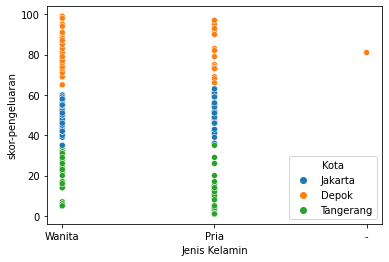

In [103]:
sns.scatterplot(data=data1, y="skor-pengeluaran",x="Jenis Kelamin",hue="Kota") #ditemukan 

In [104]:
data1.tail(20) #Untuk melihat nilai "-" berada pada baris ke berapa

,Jenis Kelamin,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
178,Wanita,17213114,55,Jakarta,1.0,Senin,8,Dewasa,< Rp20.000.000
179,Pria,23770491,73,Depok,1.0,Minggu,1,Dewasa,< Rp50.000.000
180,Pria,28688524,26,Tangerang,3.0,Minggu,4,Lansia,< Rp50.000.000
181,Wanita,25409836,74,Depok,1.0,Sabtu,2,Dewasa,< Rp50.000.000
182,Wanita,43032786,16,Tangerang,3.0,Sabtu,2,Dewasa,< Rp50.000.000
183,Wanita,5737704,87,Depok,1.0,Senin,7,Dewasa,< Rp10.000.000
184,Pria,40163934,8,Tangerang,3.0,Senin,3,Dewasa,< Rp50.000.000
185,-,0,81,Depok,1.0,Jumat,0,Dewasa,< Rp5.000.000
186,Wanita,4098360,5,Tangerang,3.0,Senin,7,Dewasa,< Rp5.000.000
187,Pria,0,39,Jakarta,2.0,Senin,3,Remaja,< Rp5.000.000


In [105]:
data1 = data1.drop(185, axis=0) #Mendrop baris 185 karena ditemukannya nilai '-', nilai ini seperti missing value

In [106]:
data1.head(35)

,Jenis Kelamin,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
0,Wanita,13114754,52,Jakarta,1.0,Sabtu,2,Dewasa,< Rp20.000.000
1,Wanita,33606557,86,Depok,1.0,Minggu,6,Dewasa,< Rp50.000.000
2,Pria,15983606,41,Jakarta,2.0,Minggu,3,Lansia,< Rp20.000.000
3,Pria,12704918,55,Jakarta,1.0,Rabu,7,Remaja,< Rp20.000.000
4,Wanita,20081967,42,Jakarta,2.0,Senin,8,Dewasa,< Rp50.000.000
5,Wanita,29098360,95,Depok,0.0,Senin,0,Dewasa,< Rp50.000.000
6,Pria,21311475,56,Jakarta,1.0,Senin,5,Dewasa,< Rp50.000.000
7,Wanita,2049180,77,Depok,1.0,Senin,3,Dewasa,< Rp5.000.000
8,Wanita,13524590,47,Jakarta,2.0,Selasa,6,Dewasa,< Rp20.000.000
9,Wanita,19262295,42,Jakarta,2.0,Senin,4,Dewasa,< Rp20.000.000


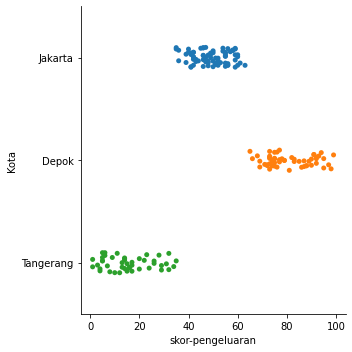

In [107]:
p=sns.catplot(y="Kota", x="skor-pengeluaran", data=data1)

Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. Terlihat pada grafik catplot bahwa skor yang diberikan oleh MixITup untuk mengukur seberapa besar pengeluaran customer di MixITUp terbesar terdapat di kota Depok di range 60 sampai 100. Sedangkan, untuk besar pengeluaran customer di MixITUp terkecil terdapat di kota Tangerang dengan range 0 sampai 40.

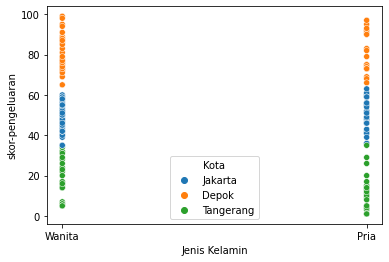

In [108]:
sns.scatterplot(data=data1, y="skor-pengeluaran",x="Jenis Kelamin",hue="Kota")

Dari scatter plot di atas, terlihat bahwa wanita memiliki loyalitas yang lebih besar dibandingkan dengan pria pada kota Depok dengan skor pengeluaran di range 60 sampai 100.

In [109]:
import matplotlib as plt

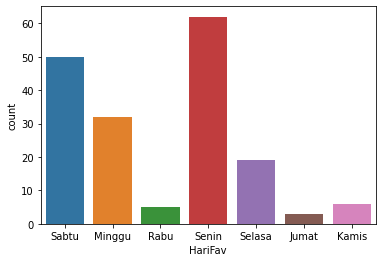

In [110]:
sns.countplot(x='HariFav', data=data1) #Tingkatin promo di hari rabu sama jumat

Dari countplot di atas, dapat dilihat bahwa hari Senin merupakan hari dimana pelanggan paling sering menggunakan kartu loyality program untuk membeli produk di MixItup, sedangkan pada hari Rabu dan Jumat dapat dilihat pelanggan paling sedikit menggunakan kartu loyality program. Oleh karena hal itu, disarankan kepada MixlTup untuk memberikan promo yang menarik pada hari Rabu dan Jumat agar antusiasme pelanggan meningkat untuk membeli produk di MixlTup.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


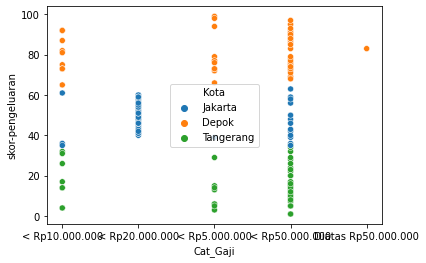

In [111]:
sns.scatterplot('Cat_Gaji', 'skor-pengeluaran', hue='Kota', data=data1);


Terdapat beberapa pola. Tetapi, kita dapat membuat customer segments sebagai berikut:
1. Pendapatan rendah, skor pengeluaran rendah
2. Pendapatan rendah, skor pengeluaran tinggi
3. Pendapatan sedang, skor pengeluaran sedang
4. Pendapatan tinggi, skor pengeluaran rendah
5. Pendapatan tinggi, skor pengeluaran tinggi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


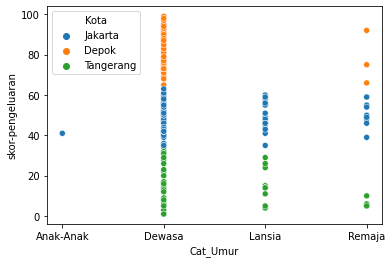

In [87]:
sns.scatterplot('Cat_Umur', 'skor-pengeluaran', hue='Kota', data=data1);


# **K-MEANS CLUSTERING**

In [112]:
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

In [113]:
X = data1[['Promo','FavFlavor']].values
C = data1['skor-pengeluaran'].values
print(X.shape)
data1.sample(7)

(177, 2)


,Jenis Kelamin,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Cat_Umur,Cat_Gaji
81,Wanita,17213114,58,Jakarta,1.0,Sabtu,3,Lansia,< Rp20.000.000
1,Wanita,33606557,86,Depok,1.0,Minggu,6,Dewasa,< Rp50.000.000
3,Pria,12704918,55,Jakarta,1.0,Rabu,7,Remaja,< Rp20.000.000
158,Pria,29508196,75,Depok,1.0,Senin,5,Dewasa,< Rp50.000.000
199,Pria,1639344,14,Tangerang,3.0,Minggu,6,Lansia,< Rp5.000.000
161,Pria,20081967,46,Jakarta,2.0,Senin,8,Remaja,< Rp50.000.000
137,Wanita,24180327,72,Depok,1.0,Senin,4,Dewasa,< Rp50.000.000


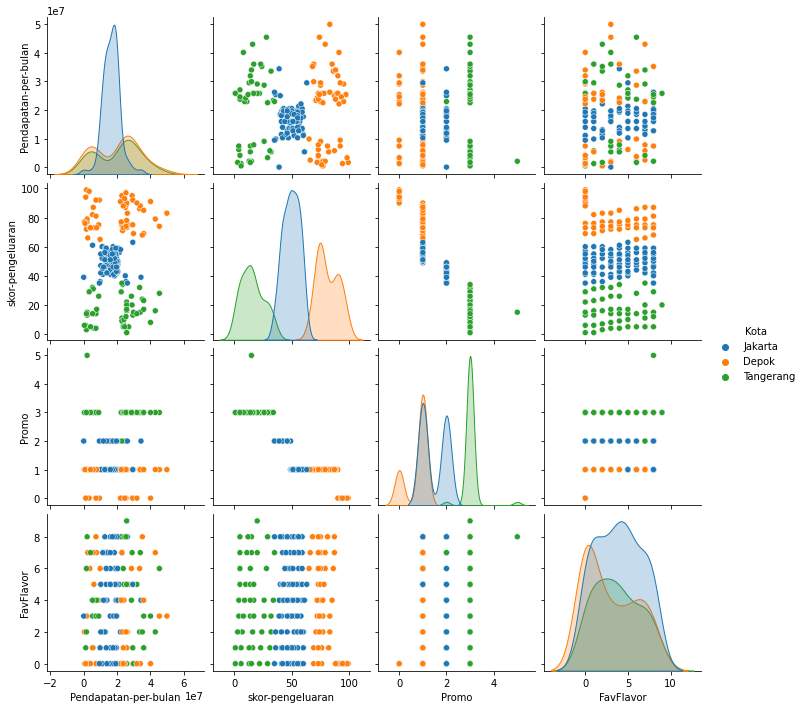

In [114]:
g = sns.pairplot(data1, hue="Kota")

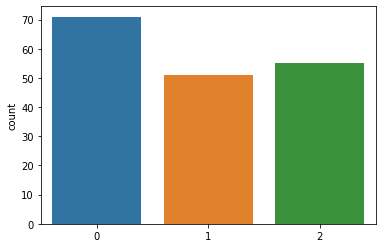

In [115]:
k = 3
km = cluster.KMeans(n_clusters=k, init='random', random_state = 0)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

In [116]:
C_km #melebeli hasil cluster

array([0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0,
       0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2,
       2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0,
       1], dtype=int32)

In [117]:
km.inertia_

279.2210489317366

Text(0.5, 1.0, 'Elbow curve')

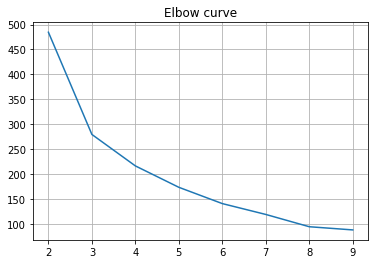

In [118]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

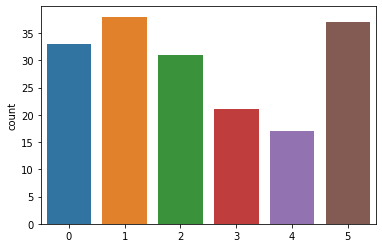

In [119]:
k = 6
km = cluster.KMeans(n_clusters=k, init='random', random_state = 0)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

In [120]:
C_km #melebeli hasil cluster

array([3, 2, 1, 5, 5, 0, 2, 1, 2, 1, 0, 5, 1, 5, 4, 5, 1, 2, 1, 3, 3, 5,
       0, 4, 0, 1, 5, 0, 0, 2, 3, 2, 0, 0, 2, 1, 4, 0, 3, 0, 5, 4, 5, 0,
       2, 3, 2, 3, 3, 3, 1, 4, 1, 3, 2, 0, 3, 5, 3, 1, 5, 4, 5, 0, 1, 4,
       3, 2, 2, 1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 2, 1, 0, 5, 3, 4, 4, 5, 3,
       2, 0, 4, 1, 1, 0, 5, 5, 5, 2, 0, 5, 4, 1, 1, 5, 0, 4, 1, 5, 4, 2,
       1, 0, 2, 5, 2, 5, 0, 2, 5, 1, 2, 1, 3, 2, 5, 4, 5, 2, 4, 5, 5, 4,
       2, 0, 0, 0, 1, 0, 2, 4, 0, 5, 0, 1, 3, 1, 2, 2, 5, 1, 1, 5, 3, 2,
       1, 2, 5, 5, 5, 0, 1, 3, 3, 5, 1, 5, 1, 1, 5, 0, 1, 1, 0, 2, 5, 0,
       2], dtype=int32)

In [121]:
km.inertia_

149.89140529503064

Pada awalnya digunakan k=3. Setelah menggunakan elbow method, didapatkan patahan/siku berada di angka 3 dan 6. Pada angka 3, didapatkan total jarak ke setiap centroid yaitu sebesar 279.22 sedangkan pada angka 6, didapatkan total jarak ke setiap centroid yaitu sebesar 149.89. Jika inertia semakin kecil, maka hasil K-Means semakin baik. Sehingga, kita ambil k=6.

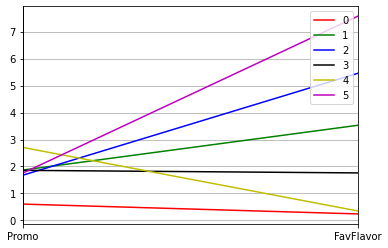

In [122]:
cols = ['Promo','FavFlavor']
dfC = pd.DataFrame(km.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b', 'k', 'y', 'm'))
plt.show()

Dari grafik diatas, didapat bahwa clustering pertama memberikan output terendah dan clustering keenam memberikan output tertinggi.